In [10]:
from PIL import Image
import sys
sys.path.insert(0, "/Users/martin/Programmierung/Python/Digethic/hakare/src")
import autoencoder
import convert_img
import data
import torch
from torchsummary import summary
import matplotlib.pyplot as plt
from os import path
from torchvision.utils import save_image

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


In [2]:
dataset = data.Characters(data.PATH_TO_DATA_SHORT, 128, 128, 1)
train, valid, test = data.split(dataset, batch_size=32)
model = autoencoder.AutoEncoder().to(DEVICE)
summary(model, (1, 128, 128))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]             320
              ReLU-2           [-1, 32, 64, 64]               0
         MaxPool2d-3           [-1, 32, 32, 32]               0
            Conv2d-4           [-1, 64, 16, 16]          18,496
              ReLU-5           [-1, 64, 16, 16]               0
         MaxPool2d-6             [-1, 64, 8, 8]               0
            Conv2d-7            [-1, 128, 4, 4]          73,856
              ReLU-8            [-1, 128, 4, 4]               0
         MaxPool2d-9            [-1, 128, 2, 2]               0
           Linear-10                   [-1, 25]          12,825
             ReLU-11                   [-1, 25]               0
           Linear-12                  [-1, 512]          13,312
             ReLU-13                  [-1, 512]               0
  ConvTranspose2d-14             [-1, 6

In [3]:
model, train_losses, valid_losses = autoencoder.train(model, train, valid, 10)


Error in epoch 0: 0.009697303885505312
Error in epoch 1: 0.006045628612535814
Error in epoch 2: 0.006045541459960597
Error in epoch 3: 0.006045690190697473
Error in epoch 4: 0.0060457766632593815
Error in epoch 5: 0.006045299375222789
Error in epoch 6: 0.006045557100266692
Error in epoch 7: 0.006045917632974802
Error in epoch 8: 0.0060453271448967
Error in epoch 9: 0.006045906035791314


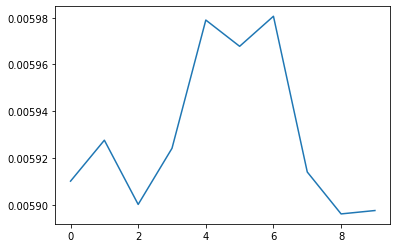

In [4]:
plt.plot(valid_losses)


In [5]:
model = torch.load(path.join("..", "data", "models", "model.pt"))
test_loss = autoencoder.eval_model(model, test, torch.nn.MSELoss(), [])


In [6]:
test_loss

[0.005803926860129363]

In [7]:
img = autoencoder.reconstruct(
    "/Volumes/MACBACKUP/DataSets/images/ETL9G/0x4e5d/024934.png", model)


tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [-0.0627, -0.0627,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]],
       grad_fn=<SubBackward0>)


In [8]:
img_in = Image.open("/Volumes/MACBACKUP/DataSets/images/ETL9G/0x4e5d/024934.png")
img_in = img_in.resize((128, 128))
img_in.show()


In [8]:
img.show()

In [8]:
enc = autoencoder.encode("/Volumes/MACBACKUP/DataSets/images/ETL9G/0x4e5d/024934.png", model)


In [11]:
enc = enc.view(5,5)
save_image(enc, path.join("..", "data", "tmp", "enc.png"))
